# Clustering Assignment - HELP International

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation
from matplotlib.pyplot import xticks
%matplotlib inline

# To perform Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Data Preparation

In [6]:
 pwd

'C:\\Users\\MSCB\\Desktop\\UPGRAD'

In [8]:
import os
print(os.getcwd())

C:\Users\MSCB\Desktop\UPGRAD


In [9]:
os.listdir()

['.ipynb_checkpoints',
 'Bike_Sharing_Assignment_Final_Ruturaj_Karnad.ipynb',
 'Course 1 - Data Toolkit',
 'Course 2 - Machine Learning',
 'Excel Tips.docx',
 'Jupiter NB',
 'Learner+Placement+Policy+-+DS+C14.pdf',
 'Linear Vs Logistics.docx',
 'Pattern prints.xlsx',
 'PGD DS Curriculum.pdf',
 'Sample-Questions.pdf',
 'ShortcutTracker-Session1-AnalyticswithExcel.pdf',
 'Untitled.ipynb',
 'upgrad imp links.txt']

In [11]:
data = pd.read_csv('Course 2 - Machine Learning\\Clustering Assignment\\Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Inspecting Data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [14]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:
data.shape

(167, 10)

In [16]:
## Data Cleaning 
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## EDA 

### Univariate Analysis

##### We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

##### We Will look at the lowest 10 countries for each factor.

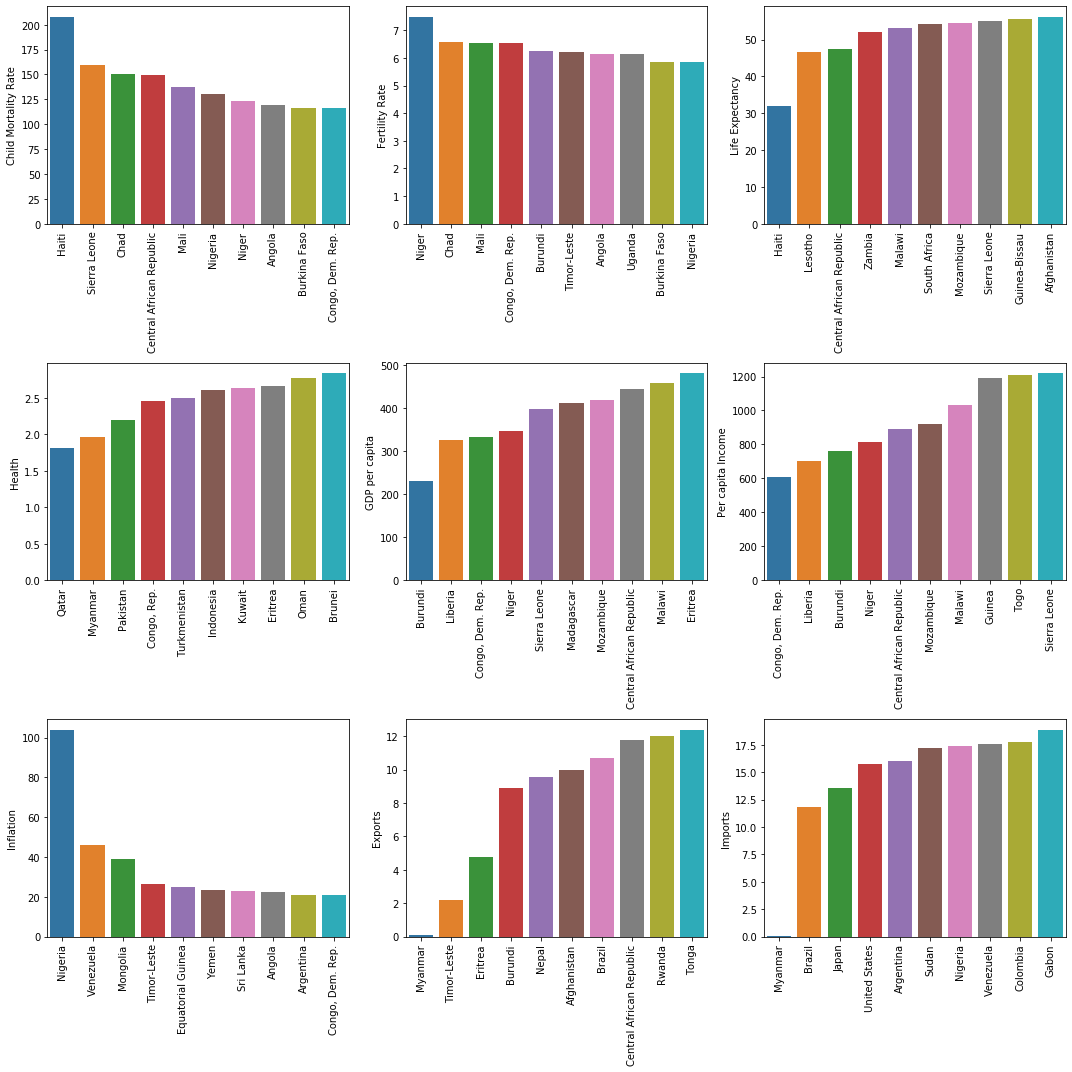

In [19]:

fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

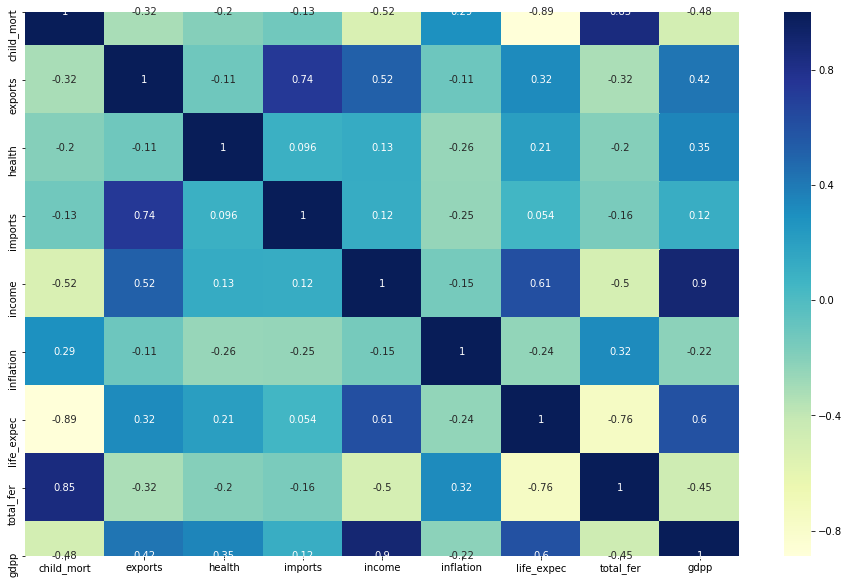

In [20]:
# Heatmap to check the corelation between the variables

plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), annot = True,cmap = 'YlGnBu')
plt.savefig('corrplot')
plt.show()

#### There is high corelation between some variables, thus we will use PCA to solve this issue.

## Outlier Analysis

#### To see how values in each column are distributed using Box Plots

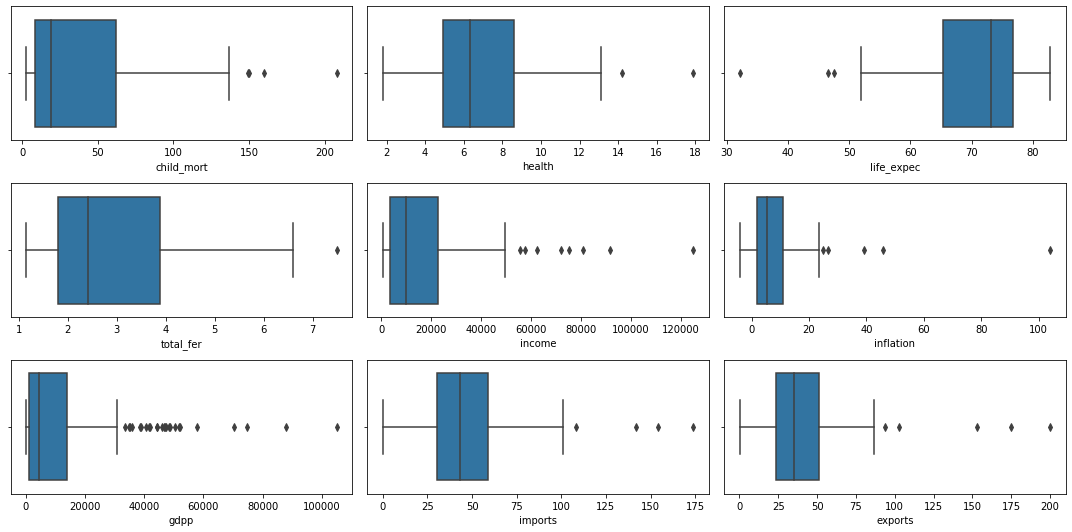

In [21]:
fig,axs = plt.subplots(3,3,figsize = (15,7.5))
plt1 = sns.boxplot(data['child_mort'],ax =axs[0,0])
plt2 = sns.boxplot(data['health'],ax =axs[0,1])
plt3= sns.boxplot(data['life_expec'],ax =axs[0,2])
plt4 = sns.boxplot(data['total_fer'],ax =axs[1,0])
plt5 = sns.boxplot(data['income'],ax =axs[1,1])
plt6 = sns.boxplot(data['inflation'],ax =axs[1,2])
plt7 = sns.boxplot(data['gdpp'],ax =axs[2,0])
plt8 = sns.boxplot(data['imports'],ax =axs[2,1])
plt9 = sns.boxplot(data['exports'],ax =axs[2,2])

plt.tight_layout()


In [22]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [23]:
# Saving a copy of the data before manipulating with it
data_help = data.copy()
data_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Keeping in mind that we need to identify backward countries based on socio economic and health factors.
### We will cap the outliers to values accordingly for analysis.

In [26]:
percentiles = data_help['child_mort'].quantile([0.05,0.95]).values
data_help['child_mort'][data_help['child_mort']<=percentiles[0]] = percentiles[0]
data_help['child_mort'][data_help['child_mort']>=percentiles[1]]= percentiles[1]

percentiles = data_help['health'].quantile([0.05,0.95]).values
data_help['health'][data_help['health']<=percentiles[0]] = percentiles[0]
data_help['health'][data_help['health']>=percentiles[1]]= percentiles[1]

percentiles = data_help['life_expec'].quantile([0.05,0.95]).values
data_help['life_expec'][data_help['life_expec']<=percentiles[0]] = percentiles[0]
data_help['life_expec'][data_help['life_expec']>=percentiles[1]]= percentiles[1]

percentiles = data_help['total_fer'].quantile([0.05,0.95]).values
data_help['total_fer'][data_help['total_fer']<=percentiles[0]] = percentiles[0]
data_help['total_fer'][data_help['total_fer']>=percentiles[1]]= percentiles[1]

percentiles = data_help['income'].quantile([0.05,0.95]).values
data_help['income'][data_help['income']<=percentiles[0]] = percentiles[0]
data_help['income'][data_help['income']>=percentiles[1]]= percentiles[1]

percentiles = data_help['inflation'].quantile([0.05,0.95]).values
data_help['inflation'][data_help['inflation']<=percentiles[0]] = percentiles[0]
data_help['inflation'][data_help['inflation']>=percentiles[1]]= percentiles[1]

percentiles = data_help['gdpp'].quantile([0.05,0.95]).values
data_help['gdpp'][data_help['gdpp']<=percentiles[0]] = percentiles[0]
data_help['gdpp'][data_help['gdpp']>=percentiles[1]]= percentiles[1]

percentiles = data_help['imports'].quantile([0.05,0.95]).values
data_help['imports'][data_help['imports']<=percentiles[0]] = percentiles[0]
data_help['imports'][data_help['imports']>=percentiles[1]]= percentiles[1]

percentiles = data_help['exports'].quantile([0.05,0.95]).values
data_help['exports'][data_help['exports']<=percentiles[0]] = percentiles[0]
data_help['exports'][data_help['exports']>=percentiles[1]]= percentiles[1]



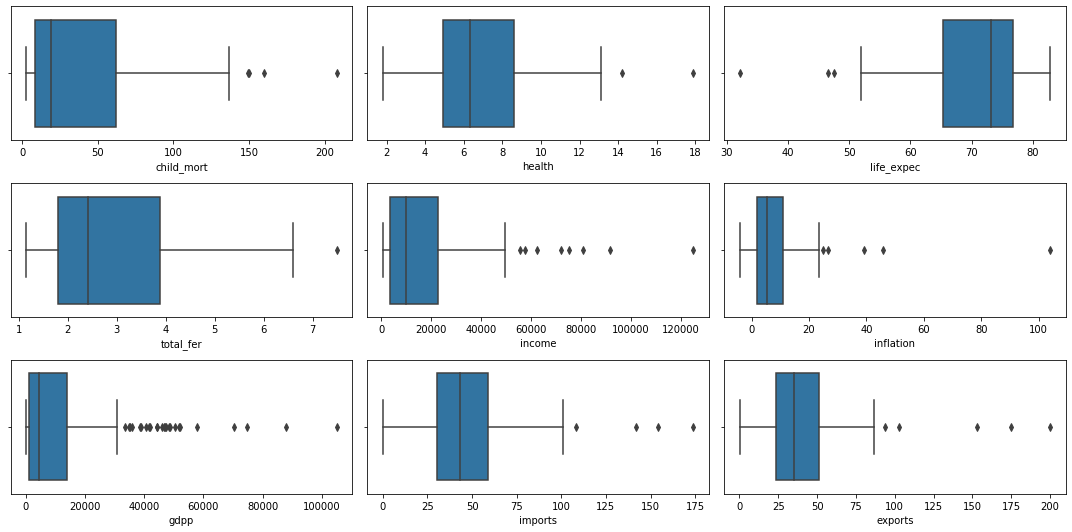

In [29]:
fig,axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(data['child_mort'],ax =axs[0,0])
plt2 = sns.boxplot(data['health'],ax =axs[0,1])
plt3= sns.boxplot(data['life_expec'],ax =axs[0,2])
plt4 = sns.boxplot(data['total_fer'],ax =axs[1,0])
plt5 = sns.boxplot(data['income'],ax =axs[1,1])
plt6 = sns.boxplot(data['inflation'],ax =axs[1,2])
plt7 = sns.boxplot(data['gdpp'],ax =axs[2,0])
plt8 = sns.boxplot(data['imports'],ax =axs[2,1])
plt9 = sns.boxplot(data['exports'],ax =axs[2,2])

plt.tight_layout()



### Scaling The Data

In [31]:
# Importing the necessary library
from sklearn.preprocessing import StandardScaler

# Creating Object
scaler = StandardScaler()

# List of variables needed to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data_help[varlist] = scaler.fit_transform(data_help[varlist])


## PCA on the Data

In [32]:
# Importing PCA Module
from sklearn.decomposition import PCA

pca = PCA(svd_solver = 'randomized', random_state = 42)

In [33]:
# Putting feature variable to X
X = data_help.drop(['country'],axis = 1)

# Putting response variable to y
y = data_help['country']

In [34]:
# PCA on Train Data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

##### Let's plot the principal components and try to make sense of them.
##### We'll plot original features on the first 2 principal components as axes

In [35]:
pca.components_

array([[-0.42160895,  0.23215851,  0.18138104,  0.09452474,  0.41088797,
        -0.22517757,  0.43188654, -0.40669961,  0.39376375],
       [-0.03258317, -0.59983719,  0.19168693, -0.72998082,  0.11098708,
         0.07988089,  0.12988449, -0.00878386,  0.18404233],
       [-0.09428393,  0.29527442, -0.64650217, -0.2835892 ,  0.19800127,
         0.59047682,  0.11300809, -0.06007316,  0.03589817],
       [ 0.38793832,  0.2526315 ,  0.28369466,  0.01256472,  0.41985835,
         0.16961331, -0.22518888,  0.44658022,  0.49984699],
       [-0.19496981, -0.00129804,  0.57952816,  0.18931716, -0.12403745,
         0.72264959,  0.05960016, -0.13124081, -0.17862578],
       [ 0.07843156,  0.54568715,  0.26574055, -0.52566328, -0.06308491,
        -0.15213428, -0.37867082, -0.363629  , -0.21538782],
       [ 0.13007088, -0.35336788, -0.14921198,  0.24960141,  0.21836267,
         0.11650079, -0.56632834, -0.59096923,  0.20596242],
       [-0.77086202, -0.02580878, -0.02489726, -0.03445752,  0

In [36]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.421609,-0.032583,child_mort
1,0.232159,-0.599837,exports
2,0.181381,0.191687,health
3,0.094525,-0.729981,imports
4,0.410888,0.110987,income


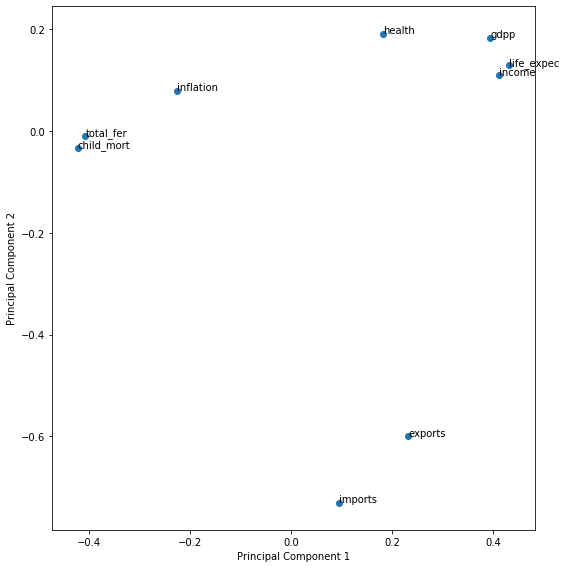

In [37]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
plt.scatter(pcs_df.PC1,pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i,txt in enumerate(pcs_df.Feature):
    plt.annotate(txt,(pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

Looking at the screeplot to assess the number of needed principal components


In [38]:
pca.explained_variance_ratio_

array([0.49017511, 0.16342205, 0.13895366, 0.0969631 , 0.06375143,
       0.01874148, 0.01568222, 0.00866931, 0.00364164])

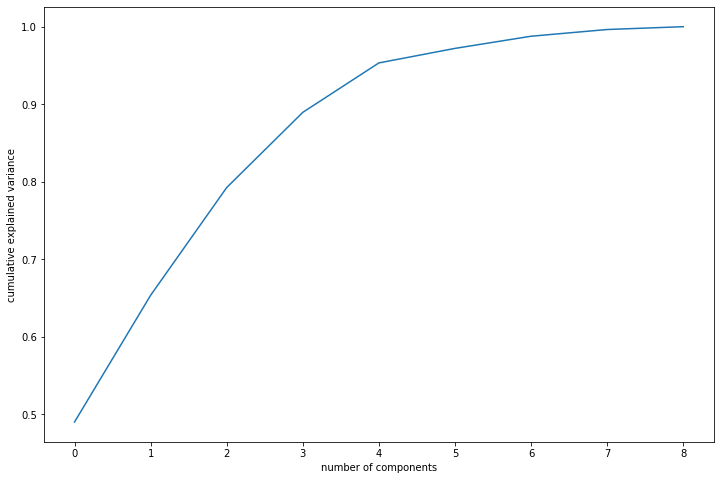

In [39]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

##### Looks like 4 components are enough to describe 95% of the variance in the dataset
##### We'll choose 4 components for our modeling

In [40]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

### Basis Transformation - Getting the data onto our PCs

In [41]:
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 4)

In [42]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-3.275735,-0.427279,-1.055235,0.906187
1,0.484002,-0.161187,-0.284701,-1.425913
2,-0.447288,-0.424384,1.832601,-0.622765
3,-3.359154,1.259661,1.980518,1.750360
4,1.244118,0.697696,-0.269638,-0.771256


### Creating correlation matrix for the principal components - we expect little to no correlation

In [43]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

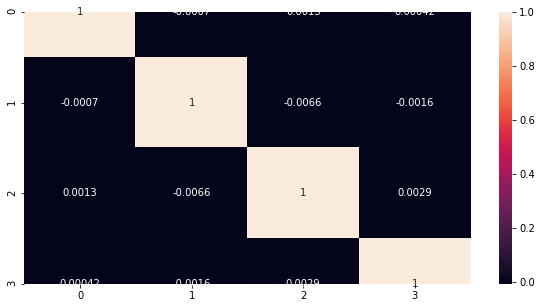

In [44]:
# Plotting the corelation Matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

## Performing K-Means Clustering

In [45]:
# Importing the required Library
from sklearn.cluster import KMeans

### Hopkins Statistics:
#### The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [46]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [47]:
hopkins(df_pca)

0.7047349026091926

## Hierarchial Clustering

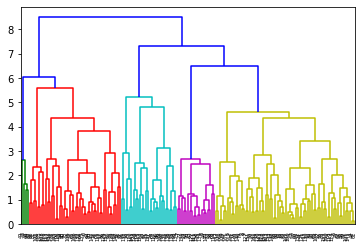

In [48]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Looking at the dedrogram it is observed that cutting it at n = 5 is most optimum.

In [49]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275735,-0.427279,-1.055235,0.906187,0
1,0.484002,-0.161187,-0.284701,-1.425913,1
2,-0.447288,-0.424384,1.832601,-0.622765,1
3,-3.359154,1.259661,1.980518,1.750360,2
4,1.244118,0.697696,-0.269638,-0.771256,1


In [50]:
pca_cluster_hc = pd.concat([data_help['country'],df_pca_hc], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.275735,-0.427279,-1.055235,0.906187,0
1,Albania,0.484002,-0.161187,-0.284701,-1.425913,1
2,Algeria,-0.447288,-0.424384,1.832601,-0.622765,1
3,Angola,-3.359154,1.259661,1.980518,1.750360,2
4,Antigua and Barbuda,1.244118,0.697696,-0.269638,-0.771256,1


In [51]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [52]:
hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [53]:
df = pd.concat([pd.Series(list(range(0,5))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,89.095652,25.519783,6.843261,43.310870,3139.413043,10.894239,59.323913,4.897609,1536.304348
1,1,22.604286,35.562700,6.167857,43.363799,10973.571429,7.732657,72.742857,2.268000,5903.057143
2,2,97.825000,70.975000,3.550000,54.425000,12027.500000,21.725000,62.400000,5.325000,6142.500000
3,3,4.268421,32.705263,10.448421,31.663158,38857.894737,1.625158,80.905263,1.812105,43505.263158
4,4,8.500000,82.021429,6.391429,70.842857,41578.214286,4.977393,77.682143,1.876071,29641.428571


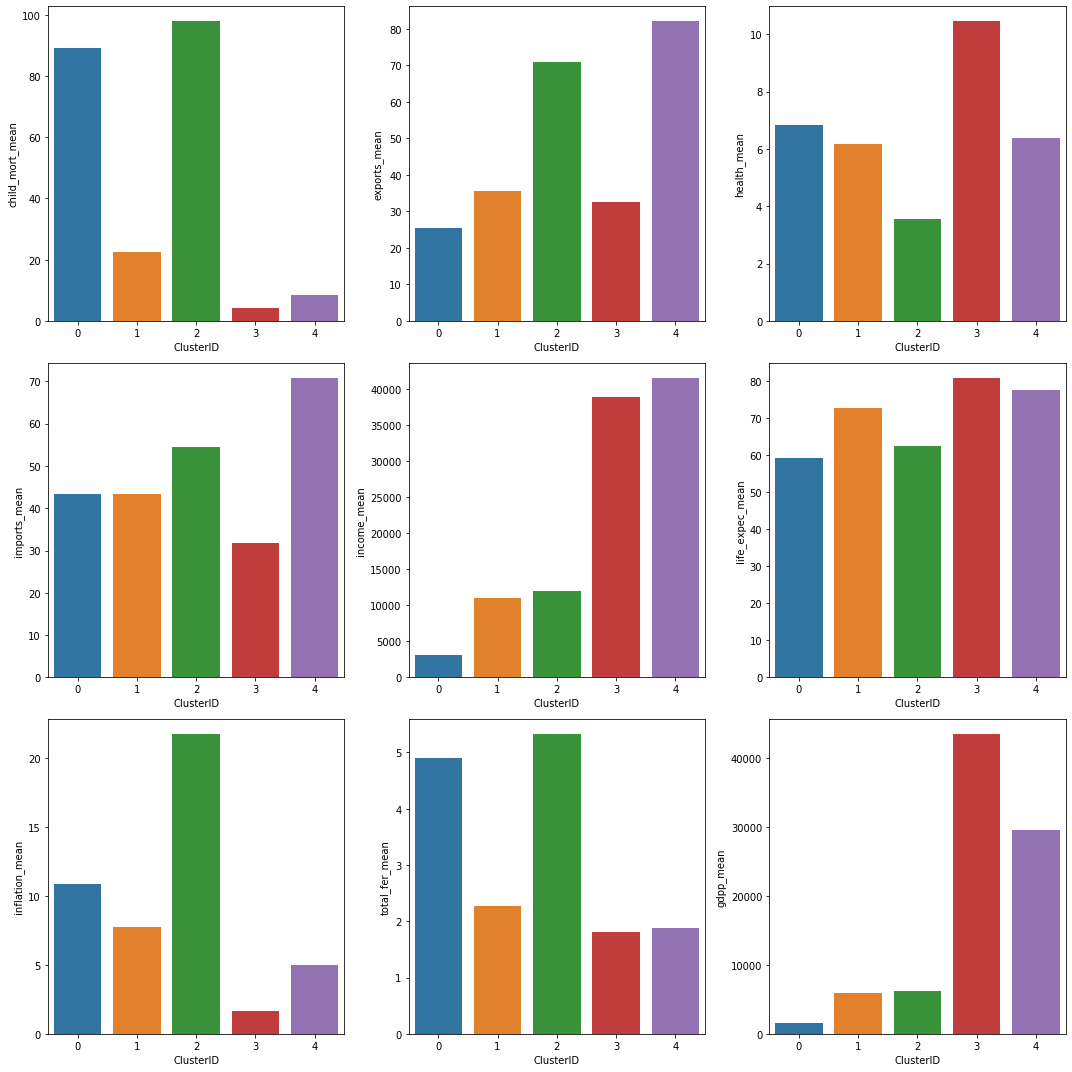

In [54]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [55]:
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

array(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

##  Recommendations
### Cluster with ClusterID as 0, is the cluster of most backward country.
#### Countries on which we require to focus more are
'Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger',
'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan',
'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia''

## These countries have 
##### - very low rate of net income per person, GDP per capita, average number of years a new born child would live, total health spending and imports of goods and services.
##### - very high rate of measurement of the annual growth rate, number of children that would be born and child mortality rate. It is clear that these countries require very quick aid in terms of money, education and services.